In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random

In [2]:
from NEAT.genome import Genome

g1 = Genome(2, 3)

In [3]:
for i in g1.nodes.genes:
    print(i.id, i.type)

1 INPUT
2 INPUT
3 OUTPUT
4 OUTPUT
5 OUTPUT


In [4]:
list_edges = []
for nodes, conn in g1.connections.genes.items():
    print(nodes, conn.Weight, conn.Enabled, conn.Innovation)
    if conn.Enabled:
        list_edges.append(nodes)

(1, 3) 0.40761776813579675 True 1
(1, 4) 0.9482080874246052 True 2
(1, 5) 0.9918993277714736 True 3
(2, 3) 0.4546353905590371 True 4
(2, 4) 0.637799787809973 True 5
(2, 5) 0.5917539705572082 True 6


1 INPUT
2 INPUT
3 OUTPUT
4 OUTPUT
5 OUTPUT


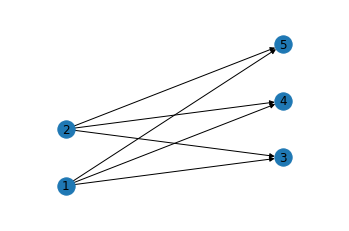

In [5]:
left_nodes = []
middle_nodes = []
right_nodes = []

for i in g1.nodes.genes:
    print(i.id, i.type)
    if i.type == "INPUT":
        left_nodes.append(i.id)
    elif i.type == "HIDDEN":
        middle_nodes.append(i.id)
    else:   # OUTPUT
        right_nodes.append(i.id)

pos = {n: (0, i) for i, n in enumerate(left_nodes)}
pos.update({n: (random.uniform(0.5, 1.5), i*random.uniform(0.5, 1.5) + 0.5) for i, n in enumerate(middle_nodes)})
pos.update({n: (2, i + 0.5) for i, n in enumerate(right_nodes)})

G = nx.DiGraph()
G.add_edges_from(list_edges)
nx.draw_networkx(G, pos)

ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

In [6]:
new_node = g1.connections.mutate_add_node(conn)
g1.nodes.add_node(new_node)

In [7]:
list_edges = []
for nodes, conn in g1.connections.genes.items():
    print(nodes, conn.Weight, conn.Enabled, conn.Innovation)
    if conn.Enabled:
        list_edges.append(nodes)

(1, 3) 0.40761776813579675 True 1
(1, 4) 0.9482080874246052 True 2
(1, 5) 0.9918993277714736 True 3
(2, 3) 0.4546353905590371 True 4
(2, 4) 0.637799787809973 True 5
(2, 5) 0.5917539705572082 False 6
(2, 6) 0.5917539705572082 True 7
(6, 5) 1 True 8


1 INPUT
2 INPUT
3 OUTPUT
4 OUTPUT
5 OUTPUT
6 HIDDEN


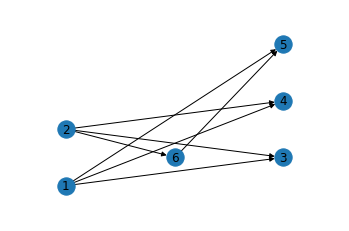

In [8]:
left_nodes = []
middle_nodes = []
right_nodes = []

for i in g1.nodes.genes:
    print(i.id, i.type)
    if i.type == "INPUT":
        left_nodes.append(i.id)
    elif i.type == "HIDDEN":
        middle_nodes.append(i.id)
    else:   # OUTPUT
        right_nodes.append(i.id)

pos = {n: (0, i) for i, n in enumerate(left_nodes)}
pos.update({n: (random.uniform(0.5, 1.5), i*random.uniform(0.5, 1.5) + 0.5) for i, n in enumerate(middle_nodes)})
pos.update({n: (2, i + 0.5) for i, n in enumerate(right_nodes)})

G = nx.DiGraph()
G.add_edges_from(list_edges)
nx.draw_networkx(G, pos)

ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()